<a href="https://colab.research.google.com/github/CaduPortifolio/An-lise/blob/main/mod06_Tarefa_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [4]:
df = pd.read_csv('./SINASC_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [5]:
#Criando coluna e bool para dados da mesma
df.loc[df['APGAR5'] >= 8, 'Respiração' ] = 'Normal'
df.loc[(df['APGAR5'] <= 7) & (df['APGAR5'] >= 6), 'Respiração' ] = 'Asfixia leve'
df.loc[(df['APGAR5'] <= 5) & (df['APGAR5'] >=4), 'Respiração'] = 'Asfixia moderada'
df.loc[(df['APGAR5'] <= 0) & (df['APGAR5'] >=3), 'Respiração'] = 'asfixia severa'

In [6]:
df.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'Respiração'],
 

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

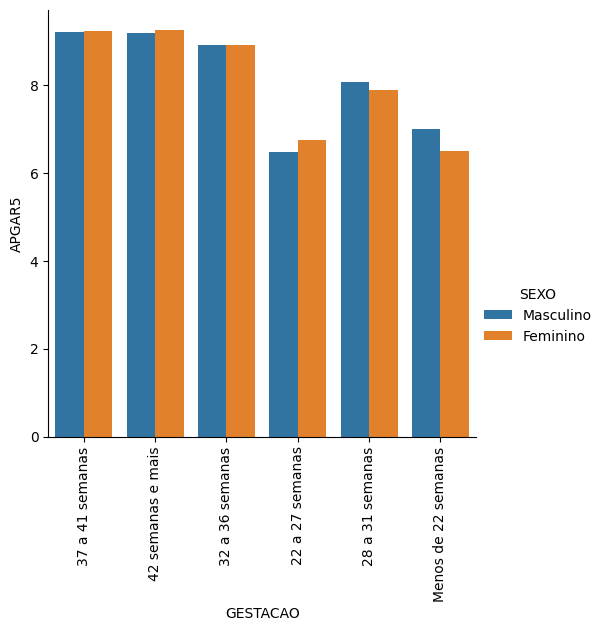

In [90]:
#Coloquei o gráfico dentro da variável para rotacionar o eixo X.

comparacao = sns.catplot(x='GESTACAO', y='APGAR5'
            , hue = 'SEXO'
            , kind='bar'
            , data=df
            , errorbar=None
           )

comparacao.set_xticklabels(rotation=90) #rotacionado o eixo x


plt.show()

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [23]:
# Criar a tabela cruzada
tabela_cruzada = pd.crosstab(index=df['GESTACAO'], columns=df['APGAR5'])

In [24]:
tabela_cruzada

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [25]:
# Calcular percentuais de linha
percentuais_linha = tabela_cruzada.div(tabela_cruzada.sum(axis=1), axis=0) * 100
percentuais_linha

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,8.235294,0.000000,9.411765,7.058824,1.176471,0.000000,2.352941,11.764706,28.235294,22.352941,9.411765
28 a 31 semanas,0.000000,0.000000,1.234568,0.617284,3.086420,4.320988,4.320988,6.790123,37.654321,33.950617,8.024691
32 a 36 semanas,0.089526,0.089526,0.089526,0.089526,0.358102,0.492390,0.760967,2.506714,16.204118,58.504924,20.814682
37 a 41 semanas,0.022200,0.088798,0.013320,0.022200,0.031079,0.093238,0.199796,0.670426,6.291347,60.227323,32.340274
42 semanas e mais,0.143266,0.000000,0.000000,0.000000,0.000000,0.143266,0.143266,0.716332,6.303725,60.601719,31.948424
Menos de 22 semanas,14.285714,0.000000,14.285714,0.000000,0.000000,0.000000,0.000000,14.285714,0.000000,42.857143,14.285714


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

##Filtrando o DataFrame.

In [83]:
df['GESTACAO'].value_counts()

,count
GESTACAO,
37 a 41 semanas,22589
32 a 36 semanas,2249
42 semanas e mais,700
28 a 31 semanas,165
22 a 27 semanas,86
Menos de 22 semanas,7


In [84]:
#aplicando filtro com uma condição
filtro_df = df[df['GESTACAO'] == '32 a 36 semanas'][['APGAR5', 'PESO', 'IDANOMAL','GESTACAO']]
filtro_df

,APGAR5,PESO,IDANOMAL,GESTACAO
20,0.0,1880,2.0,32 a 36 semanas
51,9.0,2940,2.0,32 a 36 semanas
79,10.0,2995,2.0,32 a 36 semanas
84,10.0,3092,2.0,32 a 36 semanas
102,10.0,4725,2.0,32 a 36 semanas
...,...,...,...,...
27019,9.0,1945,2.0,32 a 36 semanas
27020,9.0,2400,2.0,32 a 36 semanas
27022,9.0,2215,2.0,32 a 36 semanas
27023,9.0,2110,2.0,32 a 36 semanas


#Filtrando Prematuros.

In [85]:
# Aplicando filtro em várias condições
filtro_df2 = df[df['GESTACAO'].isin(['32 a 36 semanas', '28 a 31 semanas', '22 a 27 semanas', 'Menos de 22 semanas'])]

# Selecionar apenas as colunas desejadas
filtro_df2 = filtro_df2[['APGAR5', 'PESO', 'IDANOMAL', 'GESTACAO']]
filtro_df2

,APGAR5,PESO,IDANOMAL,GESTACAO
20,0.0,1880,2.0,32 a 36 semanas
51,9.0,2940,2.0,32 a 36 semanas
79,10.0,2995,2.0,32 a 36 semanas
84,10.0,3092,2.0,32 a 36 semanas
102,10.0,4725,2.0,32 a 36 semanas
...,...,...,...,...
27019,9.0,1945,2.0,32 a 36 semanas
27020,9.0,2400,2.0,32 a 36 semanas
27022,9.0,2215,2.0,32 a 36 semanas
27023,9.0,2110,2.0,32 a 36 semanas


#Filtrando tempo de gestação normal.

In [86]:
filtro_df3 = df[df['GESTACAO'].isin(['37 a 41 semanas','32 a 36 semanas','42 semanas e mais'])]
filtro_df3 = filtro_df3[['PESO', 'IDANOMAL', 'GESTACAO', 'APGAR5']]
filtro_df3

,PESO,IDANOMAL,GESTACAO,APGAR5
0,3685,2.0,37 a 41 semanas,10.0
1,3055,2.0,37 a 41 semanas,9.0
2,3460,2.0,37 a 41 semanas,10.0
3,2982,2.0,37 a 41 semanas,10.0
4,3310,2.0,37 a 41 semanas,10.0
...,...,...,...,...
27023,2110,2.0,32 a 36 semanas,9.0
27024,3310,2.0,37 a 41 semanas,9.0
27025,3065,2.0,37 a 41 semanas,10.0
27026,2352,2.0,32 a 36 semanas,9.0


# Criando Gráfico de prematuro.

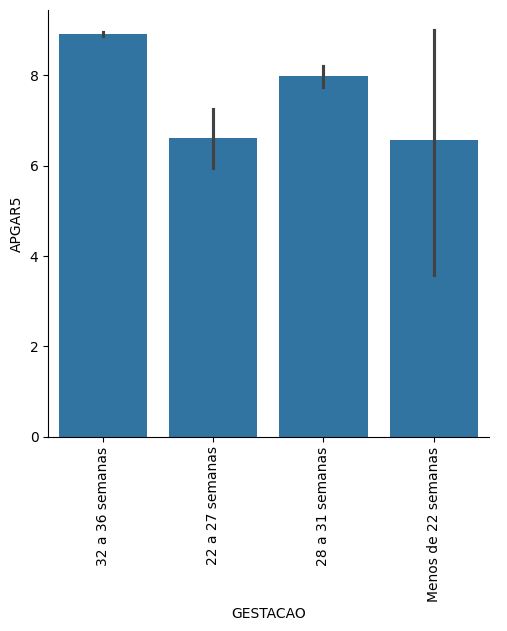

In [81]:
# Colocando o gráfico na variável para rotacionar o eixo X.
g= sns.catplot(x='GESTACAO'
           ,y='APGAR5'
           ,kind='bar'
           ,data=filtro_df2)


# Rotacionar os rótulos do eixo x
g.set_xticklabels(rotation=90)

# MOSTRANDO O GRÁFICO
plt.show()

# Criando grafico de tempo de gestação normal.

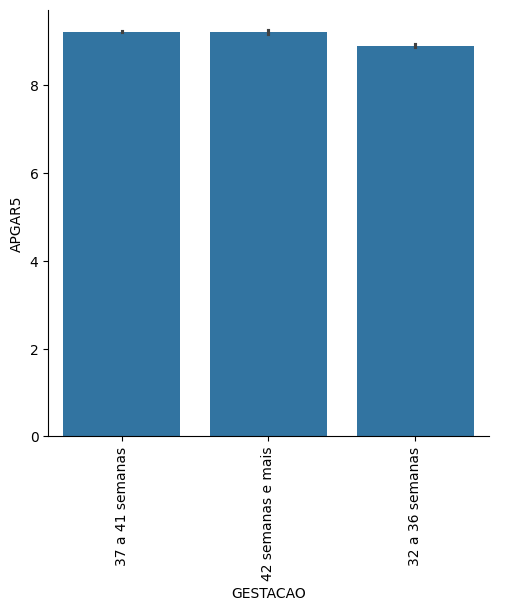

In [82]:
# Colocando o gráfico na variável para rotacionar o eixo X.
g_normal= sns.catplot(x='GESTACAO'
           ,y='APGAR5'
           ,kind='bar'
           ,data=filtro_df3)


# Rotacionar os rótulos do eixo x
g_normal.set_xticklabels(rotation=90)

# MOSTRANDO O GRÁFICO
plt.show()

In [ ]:
# Vejo que os dados não dão base a afirmação.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

##Quando falamos de bebês considerados prematuros ao cruzar os dados  de peso e apgar, verificamos que em sua maioria que quanto menor sua nota, menor também é o seu peso.

##Criando gráfico de prematuros com uma condição.


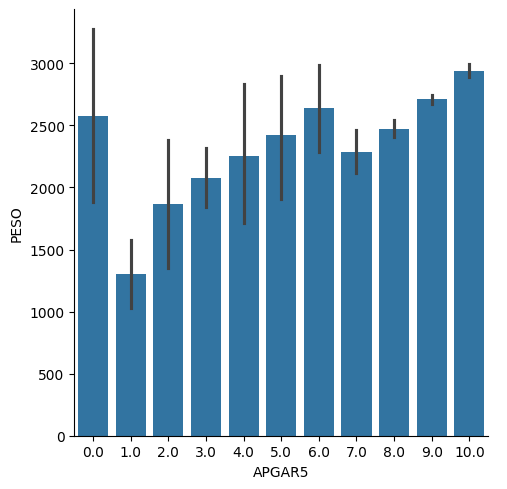

In [74]:
sns.catplot(x='APGAR5'
            , y='PESO'
            , kind='bar'
            , data=filtro_df
           )

#Prematuros com várias condições.

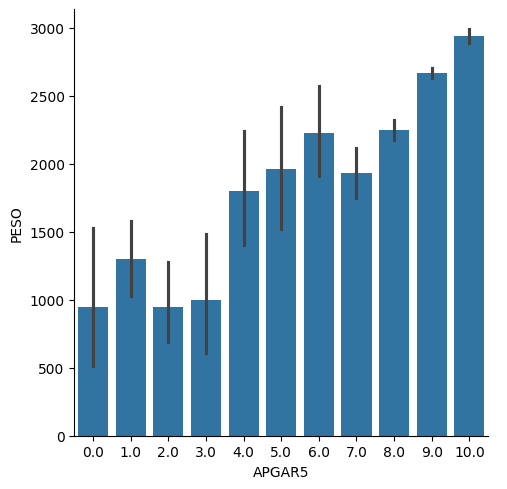

In [75]:
sns.catplot(x='APGAR5'
            , y='PESO'
            , kind='bar'
            , data=filtro_df2
           )

##Falando em bebês que não são classificado pelos médicos, a relação já não apresenta a mesma condição, pois o peso no prematuro tende a seguir a nota da APGAR5.

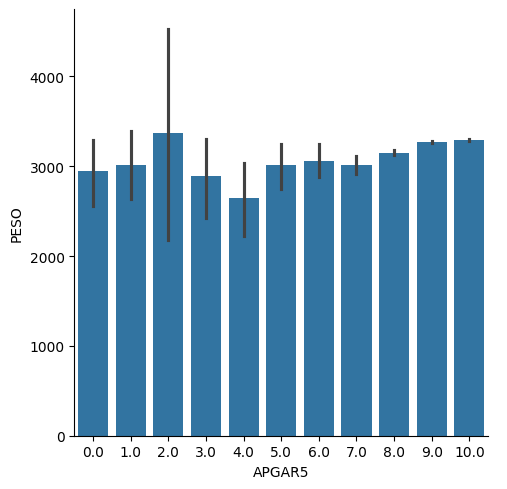

In [76]:
sns.catplot(x='APGAR5'
            , y='PESO'
            , kind='bar'
            , data=filtro_df3
           )